# Application 1: Iris classification

## Setup

### Modules

In [115]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# models
from sklearn.neighbors import KNeighborsClassifier

### Dataset

In [116]:
iris_dataset = load_iris()

In [117]:
print("Iris dataset keys: \n{}".format(iris_dataset.keys()))

Iris dataset keys: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [118]:
print(iris_dataset['DESCR'][:] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [119]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [120]:
iris_dataset['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [121]:
np.unique(iris_dataset["target"])

array([0, 1, 2])

In [122]:
counts = pd.Series(iris_dataset.target).value_counts()
counts

0    50
1    50
2    50
Name: count, dtype: int64

### Train, test split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset["data"], iris_dataset["target"], random_state=0
)

In [124]:
print("Train")
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("\nTest")
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

Train
X_train shape: (112, 4)
y_train shape: (112,)

Test
X_test shape: (38, 4)
y_test shape: (38,)


In [125]:
iris_dataframe_X = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe_X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5


## Data exploration

In [126]:
iris_dataframe_X.info()

<class 'pandas.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  112 non-null    float64
 1   sepal width (cm)   112 non-null    float64
 2   petal length (cm)  112 non-null    float64
 3   petal width (cm)   112 non-null    float64
dtypes: float64(4)
memory usage: 3.6 KB


In [127]:
iris_dataframe_X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,112.000000,112.000000,112.000000,112.000000
mean,5.886607,3.051786,3.796429,1.223214
std,0.871314,0.436196,1.800697,0.781427
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.575000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.500000,3.300000,5.200000,1.900000
max,7.900000,4.400000,6.900000,2.500000


In [128]:
# Vis using pandas.plotting
"""
iris_feat_scatter = pd.plotting.scatter_matrix(
    iris_dataframe_X,
    c=y_train,
    figsize=(15,15),
    marker='o',
    hist_kwds={'bins': 20},
    s=60,
    alpha=0.8
)
"""

"\niris_feat_scatter = pd.plotting.scatter_matrix(\n    iris_dataframe_X,\n    c=y_train,\n    figsize=(15,15),\n    marker='o',\n    hist_kwds={'bins': 20},\n    s=60,\n    alpha=0.8\n)\n"

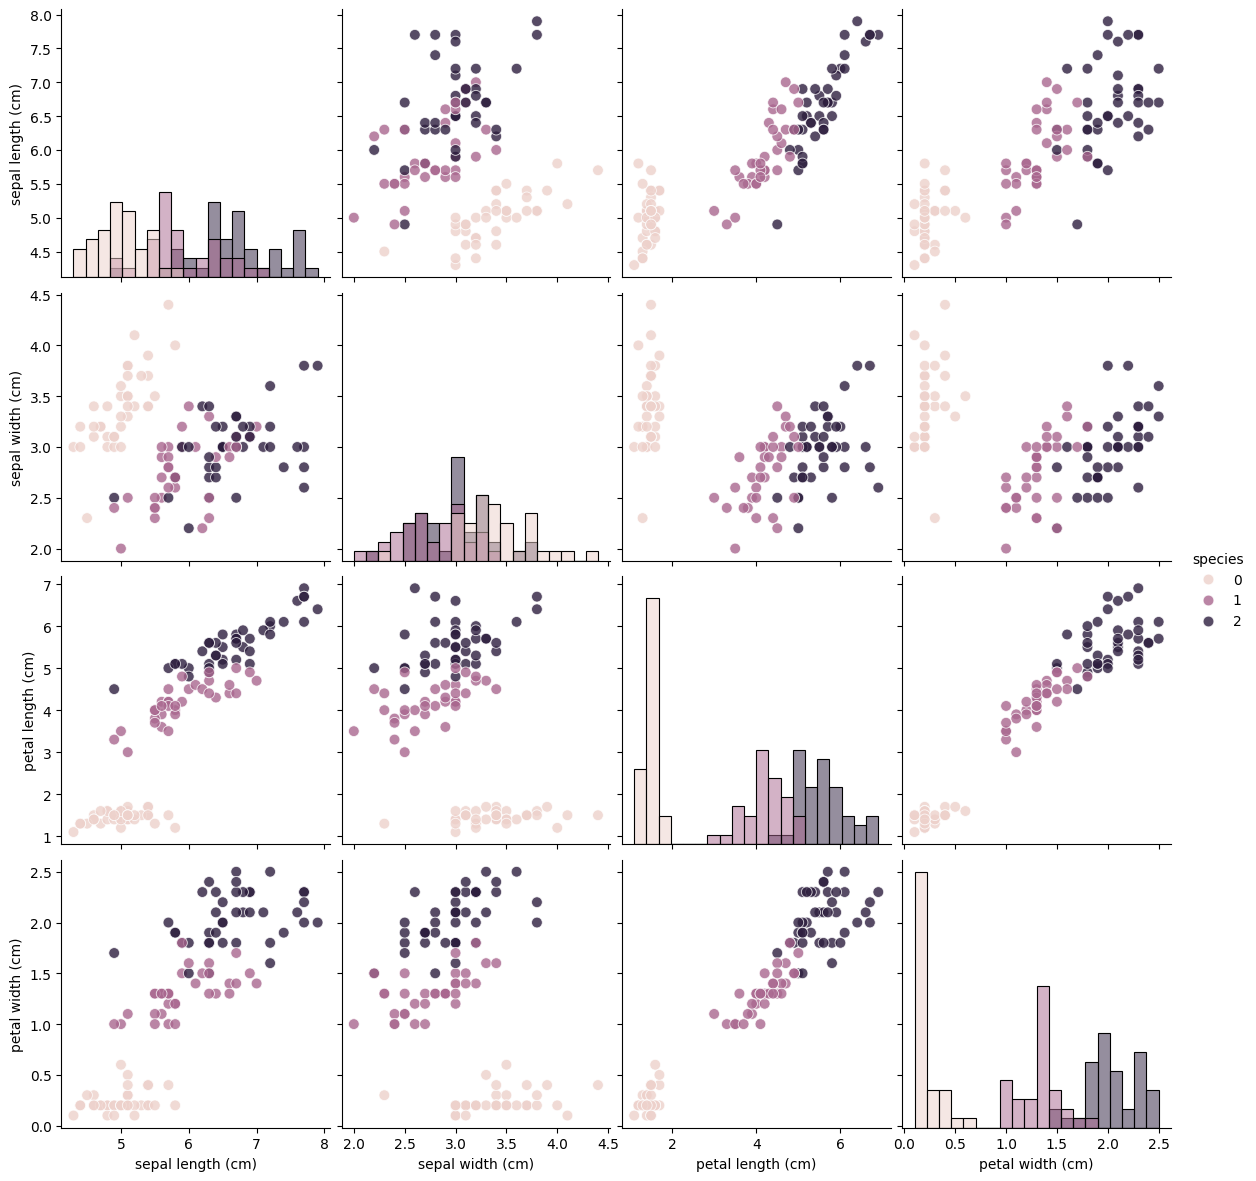

In [129]:
df_plot = iris_dataframe_X.copy()
df_plot['species'] = y_train

sns.pairplot(
    df_plot,
    hue='species',
    height=3,
    diag_kind='hist',
    diag_kws={'bins':20},
    #diag_kws={'bins':20, 'stat':'density'},
    markers='o',
    plot_kws={'s':60, 'alpha':0.8}
)

All three classes are clearly distinguishable. It is highly likely that our model will easily learn to recognize them.

## Model

### K-Neighbors Classifier

In [ ]:
# Create an instance of the KNeighborsClassifier class.
# This is the actual model object where we can set parameters (e.g., n_neighbors)
# before training it with fit() and making predictions with predict().
#
# K-Nearest Neighbors (kNN) classifies a point based on the majority class
# of its k closest points in the training data.
#
knn = KNeighborsClassifier(n_neighbors=5)

### Train

In [143]:
knn.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",10
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


### Prediction

In [144]:
# New sample
# It is important to transform the data into [[2-dimensional table]], as this is expected by sklearn
X_new = np.array(
    [[
        5,      # sepal length (cm)
        2.9,    # sepal width (cm)
        1,      # petal length (cm)
        0.2     # petal width (cm)
    ]]
)
print("X_new.shape: {}".format(X_new.shape))

X_new.shape: (1, 4)


In [145]:
prediction = knn.predict(X_new)
print("Prediction: {}".format(prediction))
print("Iris type: {}".format(
    iris_dataset['target_names'][prediction]
))

Prediction: [0]
Iris type: ['setosa']


### Evaluation

In [146]:
y_pred = knn.predict(X_test)
print("Prediction:\n {}".format(y_pred))

Prediction:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [147]:
print("Result: {:.2f}".format(knn.score(X_test, y_test)))

Result: 0.97


In [148]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [149]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

Accuracy: 0.97


In [150]:
# Confusion Matrix shows the performance of the classifier:
# - Rows correspond to true classes (actual labels)
# - Columns correspond to predicted classes
# - Each cell [i, j] indicates how many samples of class i were predicted as class j
# Ideally, all counts are on the diagonal, which means perfect predictions.
#
# 0 = setosa, 1 = versicolor, 2 = virginica
#
#               | classified as:
#               | setosa | versicolor | virginica
# setosa        |        |            |                   
# versicolor    |        |            |
# virginica     |        |            |
#
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


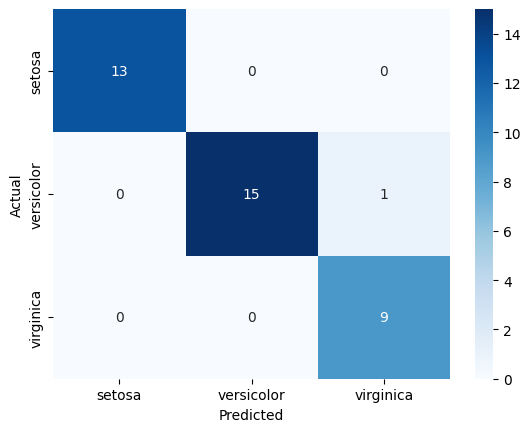

In [151]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris_dataset.target_names, yticklabels=iris_dataset.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [152]:
# Classification Report provides detailed metrics for each class:
# - precision: proportion of correct positive predictions for the class
# - recall: proportion of actual class samples correctly identified
# - f1-score: harmonic mean of precision and recall
# - support: number of true samples for each class
# This helps evaluate how well the model performs per class.
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

